In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"Warning message:
"package 'raster' was built under R version 3.4.2"

In [2]:
rasName <- "datasets/taneycomo/lulc6.tif"

In [3]:
ras <- raster(rasName, value = FALSE)

In [4]:
ras

class       : RasterLayer 
dimensions  : 56, 55, 3080  (nrow, ncol, ncell)
resolution  : 30.07721, 29.65358  (x, y)
extent      : 504490.6, 506144.9, 4059384, 4061045  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\taneycomo\lulc6.tif 
names       : lulc6 
values      : 1, 3  (min, max)


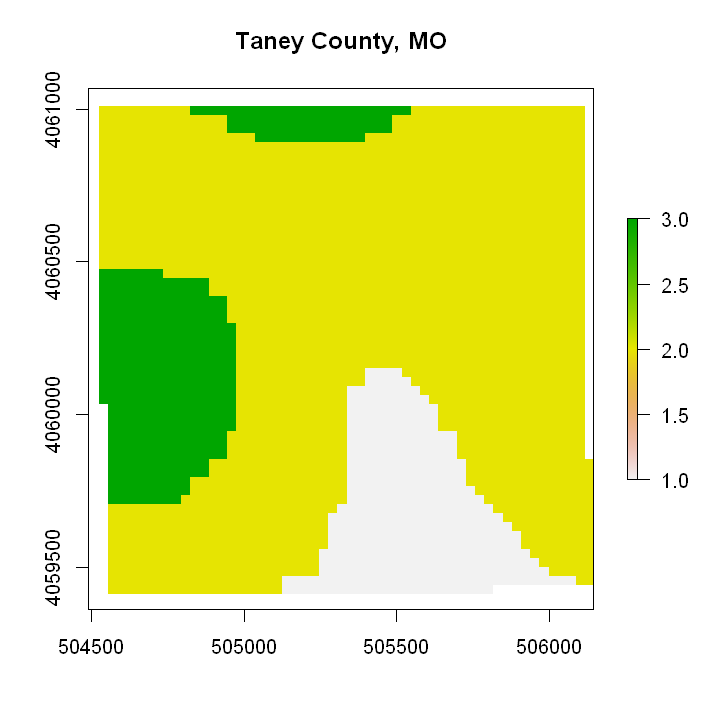

In [5]:
plot(ras, main = "Taney County, MO")

Use functionalities of the spdep library to generate a .nb object that denotes neighboring cells as those that share an edge or vertex with each cell. 

In [6]:
numcells <- ncell(ras)
numcols <- ncol(ras)
numrows <- nrow(ras)

In [7]:
print(numcells)
print(numcols)
print(numrows)

[1] 3080
[1] 55
[1] 56


In [8]:
ras[] <- 1:numcells

In [9]:
ras.nb <- cell2nb(numrows, numcols, type = "queen", torus = FALSE)

In [10]:
head(ras.nb, 20)

[[1]]
[1]  2 57 58

[[2]]
[1]  1  3 57 58 59

[[3]]
[1]  2  4 58 59 60

[[4]]
[1]  3  5 59 60 61

[[5]]
[1]  4  6 60 61 62

[[6]]
[1]  5  7 61 62 63

[[7]]
[1]  6  8 62 63 64

[[8]]
[1]  7  9 63 64 65

[[9]]
[1]  8 10 64 65 66

[[10]]
[1]  9 11 65 66 67

[[11]]
[1] 10 12 66 67 68

[[12]]
[1] 11 13 67 68 69

[[13]]
[1] 12 14 68 69 70

[[14]]
[1] 13 15 69 70 71

[[15]]
[1] 14 16 70 71 72

[[16]]
[1] 15 17 71 72 73

[[17]]
[1] 16 18 72 73 74

[[18]]
[1] 17 19 73 74 75

[[19]]
[1] 18 20 74 75 76

[[20]]
[1] 19 21 75 76 77

## Let's build our own nb from scratch

Set up a nb class object that could be understood by the spdep library from scratch.

In [11]:
# look at the structure of ras.nb

str(ras.nb)

List of 3080
 $ : int [1:3] 2 57 58
 $ : int [1:5] 1 3 57 58 59
 $ : int [1:5] 2 4 58 59 60
 $ : int [1:5] 3 5 59 60 61
 $ : int [1:5] 4 6 60 61 62
 $ : int [1:5] 5 7 61 62 63
 $ : int [1:5] 6 8 62 63 64
 $ : int [1:5] 7 9 63 64 65
 $ : int [1:5] 8 10 64 65 66
 $ : int [1:5] 9 11 65 66 67
 $ : int [1:5] 10 12 66 67 68
 $ : int [1:5] 11 13 67 68 69
 $ : int [1:5] 12 14 68 69 70
 $ : int [1:5] 13 15 69 70 71
 $ : int [1:5] 14 16 70 71 72
 $ : int [1:5] 15 17 71 72 73
 $ : int [1:5] 16 18 72 73 74
 $ : int [1:5] 17 19 73 74 75
 $ : int [1:5] 18 20 74 75 76
 $ : int [1:5] 19 21 75 76 77
 $ : int [1:5] 20 22 76 77 78
 $ : int [1:5] 21 23 77 78 79
 $ : int [1:5] 22 24 78 79 80
 $ : int [1:5] 23 25 79 80 81
 $ : int [1:5] 24 26 80 81 82
 $ : int [1:5] 25 27 81 82 83
 $ : int [1:5] 26 28 82 83 84
 $ : int [1:5] 27 29 83 84 85
 $ : int [1:5] 28 30 84 85 86
 $ : int [1:5] 29 31 85 86 87
 $ : int [1:5] 30 32 86 87 88
 $ : int [1:5] 31 33 87 88 89
 $ : int [1:5] 32 34 88 89 90
 $ : int [1:5] 33 35

In [12]:
cellList <- values(ras)

In [13]:
head(cellList)

[1] 1 2 3 4 5 6

In [14]:
length(cellList)

[1] 3080

In [15]:
scratch.nb <- list()

In [16]:
cnt <- 1

for (cell in cellList){
    cellnm <- c(cell)    
    adj <- adjacent(ras, cells = cellnm, directions = 8, pairs = FALSE, 
                        target = NULL, sorted = TRUE, include = FALSE, id = TRUE)        
    suppressMessages(
        scratch.nb[[cnt]] <- as.integer(adj)    
    )
    
    cnt <- cnt + 1
}

In [17]:
scratch.nb[1:10]

[[1]]
[1]  2 56 57

[[2]]
[1]  1  3 56 57 58

[[3]]
[1]  2  4 57 58 59

[[4]]
[1]  3  5 58 59 60

[[5]]
[1]  4  6 59 60 61

[[6]]
[1]  5  7 60 61 62

[[7]]
[1]  6  8 61 62 63

[[8]]
[1]  7  9 62 63 64

[[9]]
[1]  8 10 63 64 65

[[10]]
[1]  9 11 64 65 66

In [18]:
# set the attributes

class(scratch.nb) <- c("nb")
attr(scratch.nb, "cell") <- c(TRUE)
attr(scratch.nb, "queen") <- c(TRUE)
attr(scratch.nb, "sym") <- c(TRUE)


In [19]:
str(scratch.nb)

List of 3080
 $ : int [1:3] 2 56 57
 $ : int [1:5] 1 3 56 57 58
 $ : int [1:5] 2 4 57 58 59
 $ : int [1:5] 3 5 58 59 60
 $ : int [1:5] 4 6 59 60 61
 $ : int [1:5] 5 7 60 61 62
 $ : int [1:5] 6 8 61 62 63
 $ : int [1:5] 7 9 62 63 64
 $ : int [1:5] 8 10 63 64 65
 $ : int [1:5] 9 11 64 65 66
 $ : int [1:5] 10 12 65 66 67
 $ : int [1:5] 11 13 66 67 68
 $ : int [1:5] 12 14 67 68 69
 $ : int [1:5] 13 15 68 69 70
 $ : int [1:5] 14 16 69 70 71
 $ : int [1:5] 15 17 70 71 72
 $ : int [1:5] 16 18 71 72 73
 $ : int [1:5] 17 19 72 73 74
 $ : int [1:5] 18 20 73 74 75
 $ : int [1:5] 19 21 74 75 76
 $ : int [1:5] 20 22 75 76 77
 $ : int [1:5] 21 23 76 77 78
 $ : int [1:5] 22 24 77 78 79
 $ : int [1:5] 23 25 78 79 80
 $ : int [1:5] 24 26 79 80 81
 $ : int [1:5] 25 27 80 81 82
 $ : int [1:5] 26 28 81 82 83
 $ : int [1:5] 27 29 82 83 84
 $ : int [1:5] 28 30 83 84 85
 $ : int [1:5] 29 31 84 85 86
 $ : int [1:5] 30 32 85 86 87
 $ : int [1:5] 31 33 86 87 88
 $ : int [1:5] 32 34 87 88 89
 $ : int [1:5] 33 35

In [20]:
scratch.nb.b <- nb2listw(scratch.nb, style = "B")

In [21]:
head(scratch.nb.b$neighbours)

[[1]]
[1]  2 56 57

[[2]]
[1]  1  3 56 57 58

[[3]]
[1]  2  4 57 58 59

[[4]]
[1]  3  5 58 59 60

[[5]]
[1]  4  6 59 60 61

[[6]]
[1]  5  7 60 61 62

### It works!

Convert the raster to points of R's spatialpoints type and display the resulting points on the screen.

In [22]:
rasPoints <- rasterToPoints(ras, spatial = TRUE)

In [23]:
summary(rasPoints)

Object of class SpatialPointsDataFrame
Coordinates:
        min       max
x  504505.7  506129.8
y 4059398.8 4061029.7
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Number of points: 3080
Data attributes:
     lulc6       
 Min.   :   1.0  
 1st Qu.: 770.8  
 Median :1540.5  
 Mean   :1540.5  
 3rd Qu.:2310.2  
 Max.   :3080.0  

In [24]:
rasPoints

             coordinates lulc6
1    (504505.7, 4061030)     1
2    (504535.8, 4061030)     2
3    (504565.8, 4061030)     3
4    (504595.9, 4061030)     4
5      (504626, 4061030)     5
6    (504656.1, 4061030)     6
7    (504686.1, 4061030)     7
8    (504716.2, 4061030)     8
9    (504746.3, 4061030)     9
10   (504776.4, 4061030)    10
11   (504806.4, 4061030)    11
12   (504836.5, 4061030)    12
13   (504866.6, 4061030)    13
14   (504896.7, 4061030)    14
15   (504926.8, 4061030)    15
16   (504956.8, 4061030)    16
17   (504986.9, 4061030)    17
18     (505017, 4061030)    18
19   (505047.1, 4061030)    19
20   (505077.1, 4061030)    20
21   (505107.2, 4061030)    21
22   (505137.3, 4061030)    22
23   (505167.4, 4061030)    23
24   (505197.5, 4061030)    24
25   (505227.5, 4061030)    25
26   (505257.6, 4061030)    26
27   (505287.7, 4061030)    27
28   (505317.8, 4061030)    28
29   (505347.8, 4061030)    29
30   (505377.9, 4061030)    30
31     (505408, 4061030)    31
32   (50

Calculate the distances among the pairs of points

In [25]:
head(ras.nb, 8)

[[1]]
[1]  2 57 58

[[2]]
[1]  1  3 57 58 59

[[3]]
[1]  2  4 58 59 60

[[4]]
[1]  3  5 59 60 61

[[5]]
[1]  4  6 60 61 62

[[6]]
[1]  5  7 61 62 63

[[7]]
[1]  6  8 62 63 64

[[8]]
[1]  7  9 63 64 65

In [26]:
ndlist <- nbdists(ras.nb, coordinates(rasPoints))

In [27]:
ndlist[1:8]

[[1]]
[1] 30.07721 42.23711 67.06630

[[2]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[3]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[4]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[5]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[6]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[7]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

[[8]]
[1] 30.07721 30.07721 29.65358 42.23711 67.06630

Identify the 1st and 2nd order neighborhoods (Queen's criterion) for each cell and plot each neighborhood to the screen

In [28]:
maxlag <- 2
ras.lag <- nblag(ras.nb, maxlag)

In [29]:
firstOrder <- ras.lag[[1]]
secondOrder <- ras.lag[[2]]

In [30]:
head(firstOrder)

[[1]]
[1]  2 57 58

[[2]]
[1]  1  3 57 58 59

[[3]]
[1]  2  4 58 59 60

[[4]]
[1]  3  5 59 60 61

[[5]]
[1]  4  6 60 61 62

[[6]]
[1]  5  7 61 62 63

In [31]:
head(secondOrder)

[[1]]
[1]   3  59 113 114 115

[[2]]
[1]   4  60 113 114 115 116

[[3]]
[1]   1   5  57  61 113 114 115 116 117

[[4]]
[1]   2   6  58  62 114 115 116 117 118

[[5]]
[1]   3   7  59  63 115 116 117 118 119

[[6]]
[1]   4   8  60  64 116 117 118 119 120

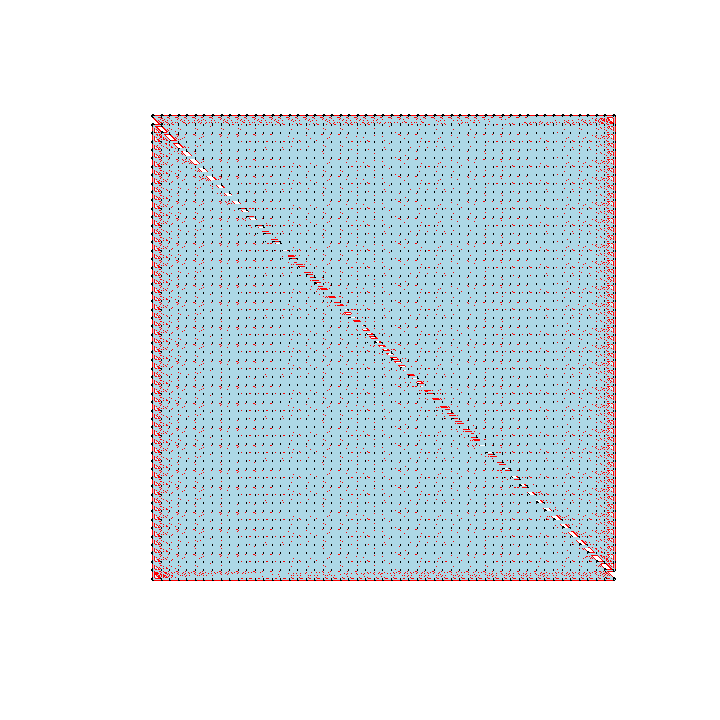

In [32]:
plot(firstOrder, coordinates(ras), col = "red", cex = 0.1, lwd = 3)
plot(secondOrder, coordinates(ras), col = "lightblue", add = TRUE, cex = 0.1, lwd = 0.5)